In [1]:
#install.packages("tidyverse")
#install.packages("ggrepel")
library('ggrepel')
library('tidyverse')

Loading required package: ggplot2

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df = read_csv("rpd.csv")
#head(df)
df %>% filter(month.day=="9/1")

Rows: 3623 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): time_corr, month.day
dbl  (10): Mileage, pace_min, Year, Month, Day, numRun, highest, rpd, firstR...
date  (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Date,Mileage,time_corr,pace_min,Year,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010-09-01,3.10,0:21:01,6.779570,2010,9,1,9/1,1,0,1,1,1
2011-09-01,2.31,0:16:06,6.969697,2011,9,1,9/1,2,0,1,1,2
2012-09-01,4.30,0:43:31,10.120155,2012,9,1,9/1,3,0,1,1,3
2013-09-01,3.62,0:26:28,7.311234,2013,9,1,9/1,4,0,1,1,4
2014-09-01,5.38,0:39:59,7.431846,2014,9,1,9/1,5,0,1,1,5
2015-09-01,9.59,NA,NA,2015,9,1,9/1,6,0,1,1,6
2016-09-01,3.20,0:17:09,5.359375,2016,9,1,9/1,7,0,1,1,7
2016-09-01,3.14,0:23:32,7.494692,2016,9,1,9/1,8,0,2,0,7
2016-09-01,4.19,NA,NA,2016,9,1,9/1,9,0,3,0,7


In [3]:
df %>% filter(Month=="9") %>% arrange(desc(Mileage)) %>% slice(1:10)

Date,Mileage,time_corr,pace_min,Year,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-09-02,18.15,2:09:21,7.126722,2018,9,2,9/2,7,0,1,1,7
2018-09-16,18.04,1:59:23,6.617701,2018,9,16,9/16,9,0,1,1,8
2020-09-12,17.72,2:02:47,6.929082,2020,9,12,9/12,10,0,1,1,9
2018-09-09,17.58,2:00:00,6.825939,2018,9,9,9/9,8,0,1,1,7
2020-09-20,16.26,1:52:40,6.929069,2020,9,20,9/20,13,0,1,1,10
2018-09-30,15.25,1:52:00,7.344262,2018,9,30,9/30,8,0,1,1,8
2025-09-01,14.29,1:45:37,7.390949,2025,9,1,9/1,15,1,1,1,13
2019-09-08,14.08,1:34:27,6.708097,2019,9,8,9/8,8,0,1,1,7
2019-09-01,14.06,1:33:59,6.684448,2019,9,1,9/1,12,0,1,1,10


In [4]:
df %>%
    filter(highest==1 & Year<2020)

Date,Mileage,time_corr,pace_min,Year,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2017-06-02,6.00,0:41:34,6.927778,2017,6,2,6/2,4,1,1,1,4
2019-10-13,13.10,1:22:46,6.318066,2019,10,13,10/13,8,1,1,1,7
2014-12-08,5.00,NA,NA,2014,12,8,12/8,3,1,1,1,3
2019-12-12,6.51,0:46:36,7.158218,2019,12,12,12/12,4,1,1,1,4
2018-12-15,10.00,NA,NA,2018,12,15,12/15,4,1,1,1,4
2018-12-29,2.87,NA,NA,2018,12,29,12/29,5,1,1,1,5


In [5]:
df %>%
    filter(numRun==1 & Year>2015)

Date,Mileage,time_corr,pace_min,Year,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2016-01-02,7.22,0:49:50,6.902124,2016,1,2,1/2,1,0,1,1,1
2016-02-17,7.63,NA,NA,2016,2,17,2/17,1,0,1,1,1
2016-02-26,6.92,0:50:05,7.237476,2016,2,26,2/26,1,0,1,1,1
2020-02-29,9.88,1:08:13,6.904521,2020,2,29,2/29,1,0,1,1,1
2016-03-05,7.14,0:53:56,7.553688,2016,3,5,3/5,1,0,1,1,1
2017-03-21,3.01,0:23:15,7.724252,2017,3,21,3/21,1,0,1,1,1
2017-03-24,10.29,1:07:52,6.595400,2017,3,24,3/24,1,0,1,1,1
2016-03-28,3.45,0:24:45,7.173913,2016,3,28,3/28,1,0,1,1,1
2016-03-29,4.26,0:30:00,7.042254,2016,3,29,3/29,1,0,1,1,1


In [6]:
dfh <- df %>%
    filter(highest==1)
head(dfh,10)

Date,Mileage,time_corr,pace_min,Year,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2025-01-01,8.37,0:56:27,6.744325,2025,1,1,1/1,11,1,1,1,11
2022-01-02,7.07,0:51:00,7.213579,2022,1,2,1/2,6,1,1,1,6
2025-01-03,2.82,0:20:59,7.440898,2025,1,3,1/3,9,1,1,1,8
2025-01-04,13.11,1:37:59,7.473938,2025,1,4,1/4,8,1,1,1,8
2024-01-05,3.11,0:21:22,6.870311,2024,1,5,1/5,11,1,1,1,11
2023-01-06,9.08,1:06:09,7.285242,2023,1,6,1/6,7,1,1,1,7
2025-01-07,5.42,0:39:12,7.232472,2025,1,7,1/7,6,1,1,1,6
2025-01-08,8.91,1:04:51,7.278339,2025,1,8,1/8,11,1,1,1,11
2021-01-09,11.12,1:17:22,6.957434,2021,1,9,1/9,6,1,1,1,6


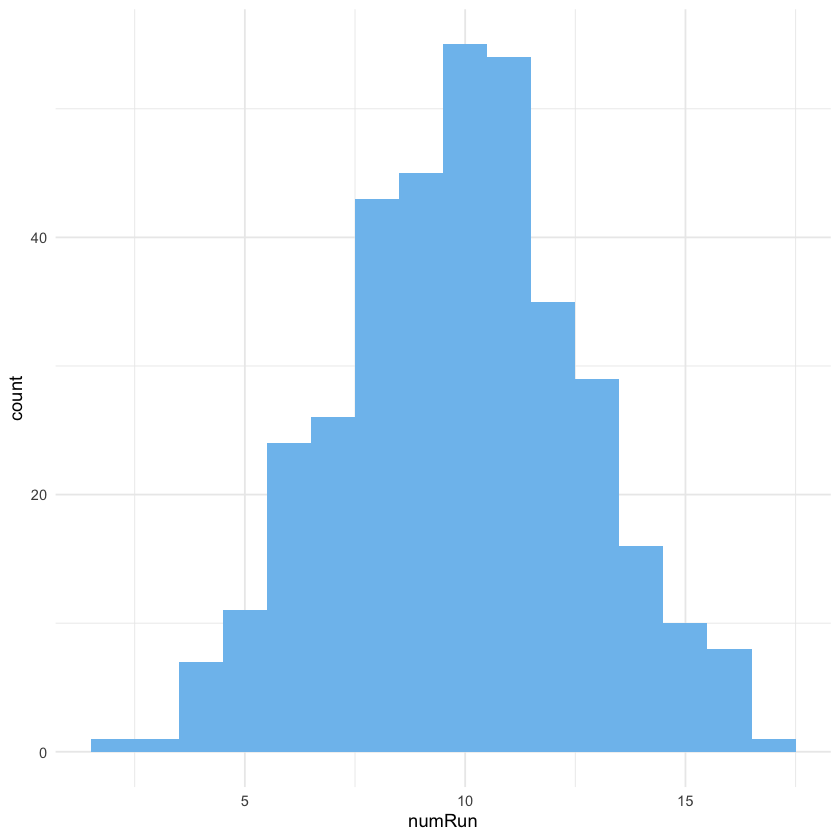

In [7]:
p = ggplot(dfh, aes(x=numRun)) +
    geom_histogram(binwidth=1, fill="skyblue2") +
    theme_minimal()
p

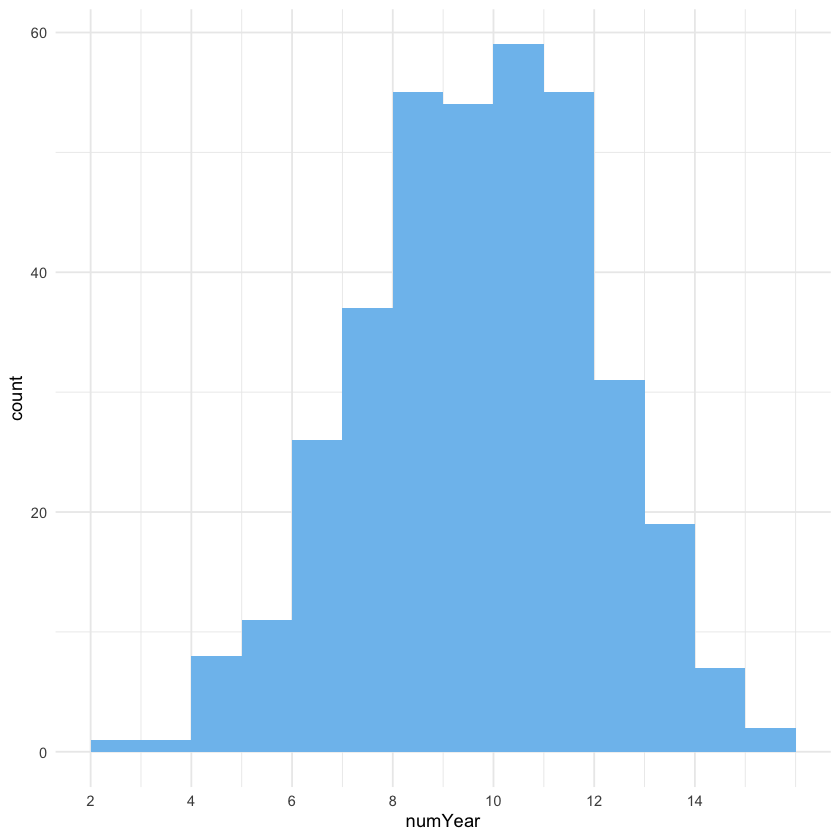

In [8]:
p2 = ggplot(dfh, aes(x=numYear)) +
    geom_histogram(binwidth=1, fill="skyblue2") +
    theme_minimal() +
    scale_x_continuous(breaks=c(-0.5,1.5,3.5,5.5,7.5,9.5,11.5,13.5),labels=c(0,2,4,6,8,10,12,14))
p2

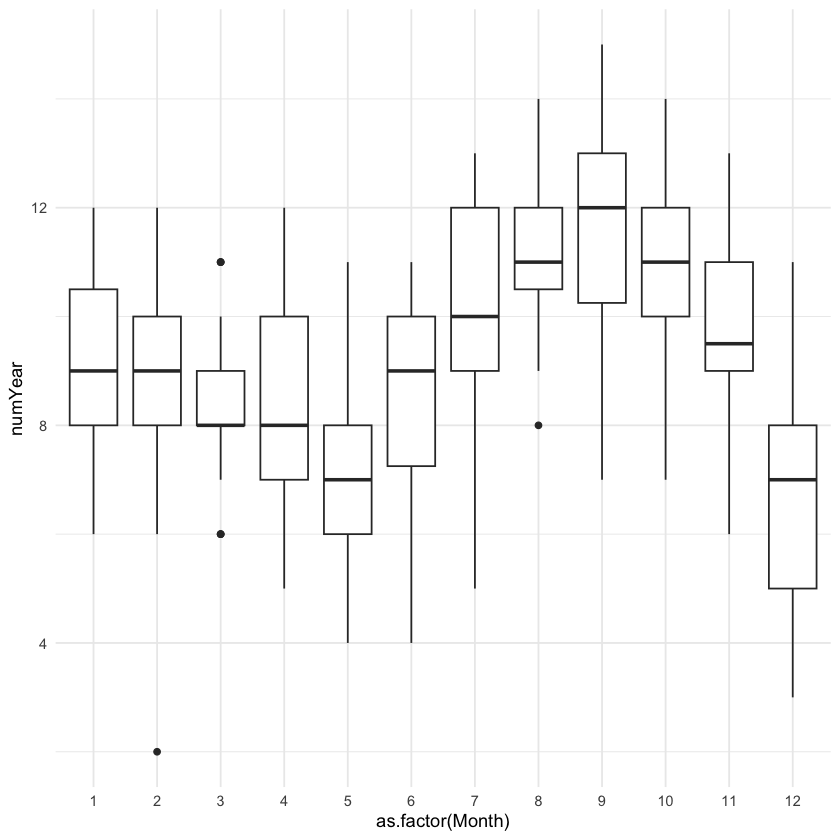

In [9]:
p3 = ggplot(dfh, aes(x=as.factor(Month), y=numYear)) +
    geom_boxplot() +
    theme_minimal()
p3

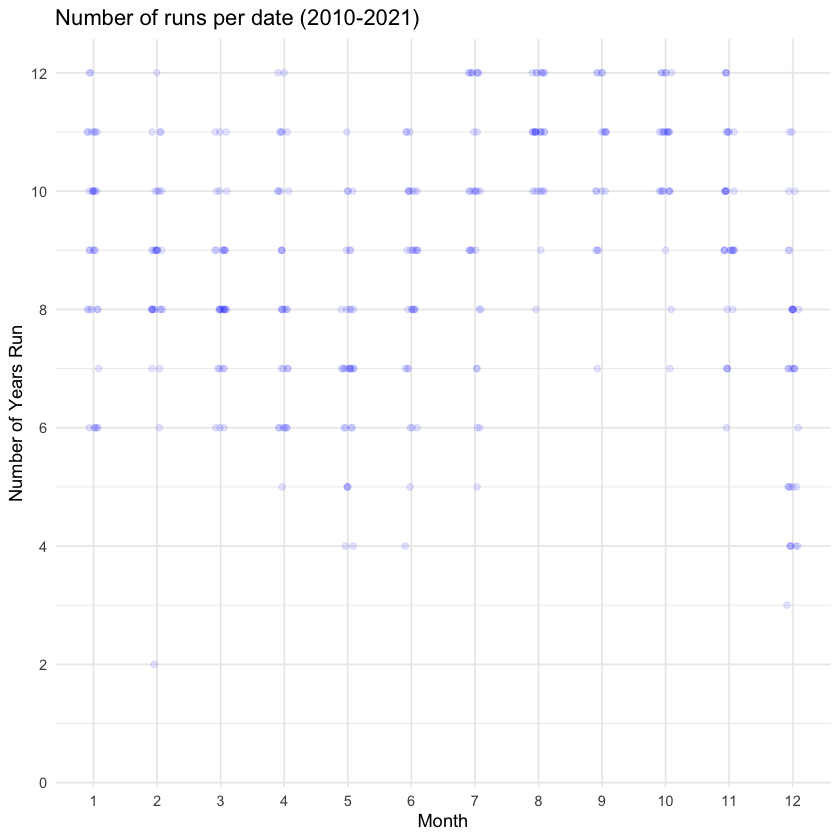

In [10]:
p3 = ggplot(dfh, aes(x=as.factor(Month), y=numYear)) +
    geom_point(position = position_jitter(h=0,w=0.1), color="blue", alpha=.1) +
    theme_minimal() +
    scale_y_continuous(breaks=c(0,2,4,6,8,10,12), labels=c(0,2,4,6,8,10,12)) +
    coord_cartesian(ylim = c(0.5,12)) +
    ggtitle("Number of runs per date (2010-2021)") +
    labs(x="Month",y="Number of Years Run")
p3

In [11]:
dfh %>%
    mutate(Date1 = paste(Month,"/",Day, sep="")) %>%
    group_by(Month) %>%
    select("Month","Date1","numYear") %>%
    arrange(numYear) %>%
    mutate(rk=row_number()) %>%
    filter(rk==1)

Month,Date1,numYear,rk
<dbl>,<chr>,<dbl>,<int>
2,2/29,2,1
12,12/8,3,1
5,5/23,4,1
6,6/2,4,1
4,4/18,5,1
7,7/10,5,1
1,1/2,6,1
3,3/19,6,1
11,11/25,6,1


In [12]:
dfh %>%
    mutate(Date1 = paste(Month,"/",Day, sep="")) %>%
    group_by(Month) %>%
    select("Month","Date1","numYear") %>%
    arrange(-numYear) %>%
    mutate(rk=row_number()) %>%
    filter(rk==1)

Month,Date1,numYear,rk
<dbl>,<chr>,<dbl>,<int>
9,9/6,15,1
8,8/19,14,1
10,10/2,14,1
7,7/8,13,1
11,11/23,13,1
1,1/13,12,1
2,2/8,12,1
4,4/1,12,1
3,3/1,11,1


In [13]:
YTD <- function(df1, DateOrder, Month, Day){
df1 %>%
    mutate(DateOrder =
           ifelse(Month==1, Day,
                  ifelse(Month==2, 31+Day,
                         ifelse(Month==3, 60+Day,
                                ifelse(Month==4, 91+Day,
                                       ifelse(Month==5, 121+Day,
                                              ifelse(Month==6, 152+Day,
                                                     ifelse(Month==7, 182+Day,
                                                            ifelse(Month==8, 213+Day,
                                                                   ifelse(Month==9, 244+Day,
                                                                          ifelse(Month==10, 274+Day,
                                                                                 ifelse(Month==11, 305+Day,
                                                                                        ifelse(Month==12, 335+Day, NA
                                                                                               )))))))))))))
}

In [14]:
dfd <- YTD(df1=dfh, DateOrder=DateOrder, Month=Month, Day=Day)
tail(dfd)

Date,Mileage,time_corr,pace_min,Year,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear,DateOrder
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2024-12-26,8.00,0:57:02,7.129167,2024,12,26,12/26,8,1,1,1,8,361
2024-12-27,5.00,0:36:17,7.256667,2024,12,27,12/27,7,1,1,1,7,362
2024-12-28,11.00,1:17:20,7.030303,2024,12,28,12/28,8,1,1,1,8,363
2018-12-29,2.87,NA,NA,2018,12,29,12/29,5,1,1,1,5,364
2024-12-30,4.00,0:33:03,8.262500,2024,12,30,12/30,10,1,1,1,10,365
2024-12-31,7.00,0:53:04,7.580952,2024,12,31,12/31,5,1,1,1,5,366


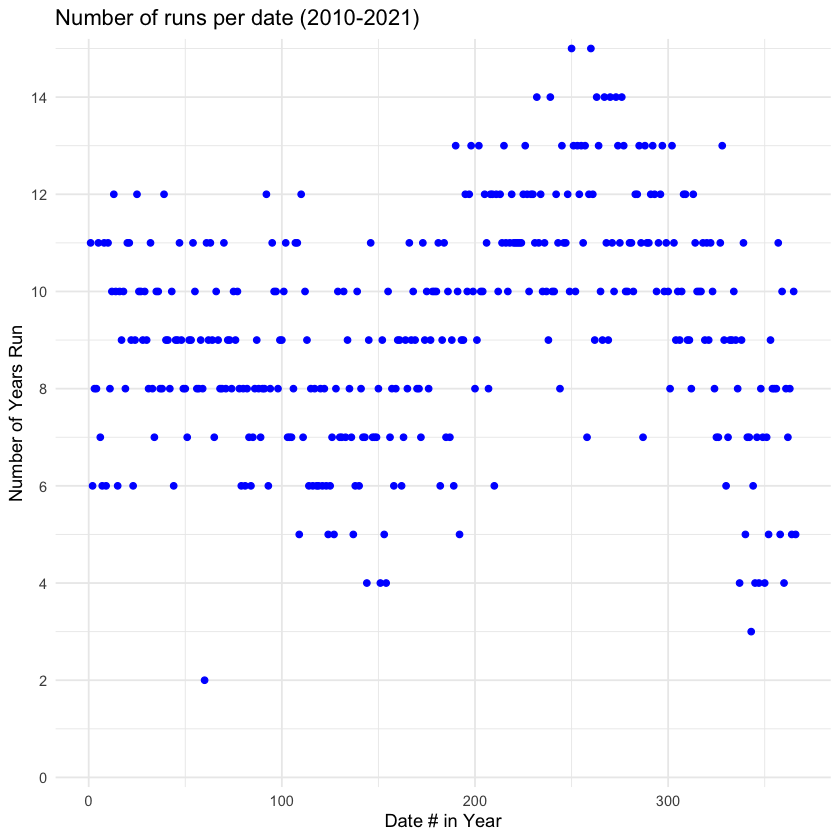

In [15]:
p4 = ggplot(dfd, aes(x=DateOrder, y=numYear)) +
    geom_point(color="blue") +
    theme_minimal() +
    scale_y_continuous(breaks=c(0,2,4,6,8,10,12,14), labels=c(0,2,4,6,8,10,12,14)) +
    coord_cartesian(ylim = c(0.5,14.5)) +
    ggtitle("Number of runs per date (2010-2021)") +
    labs(x="Date # in Year",y="Number of Years Run")
p4

In [16]:
df2 <- YTD(df, DateOrder, Month, Day)
# head(df2)
tail(df2)
#df2

Date,Mileage,time_corr,pace_min,Year,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear,DateOrder
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2024-12-30,4.00,0:33:03,8.262500,2024,12,30,12/30,10,1,1,1,10,365
2015-12-31,5.55,0:38:47,6.987988,2015,12,31,12/31,1,0,1,1,1,366
2016-12-31,5.37,0:42:46,7.963998,2016,12,31,12/31,2,0,1,1,2,366
2017-12-31,7.00,0:51:16,7.323810,2017,12,31,12/31,3,0,1,1,3,366
2020-12-31,6.00,0:44:49,7.469444,2020,12,31,12/31,4,0,1,1,4,366
2024-12-31,7.00,0:53:04,7.580952,2024,12,31,12/31,5,1,1,1,5,366


In [17]:
df2s <- df2 %>%
    group_by(DateOrder) %>%
    summarize(SumMi = sum(Mileage))
tail(df2s)

DateOrder,SumMi
<dbl>,<dbl>
361,52.34
362,46.13
363,51.84
364,24.67
365,51.27
366,30.92


In [18]:
df2d <- full_join(dfd, df2s, by="DateOrder") %>%
    mutate(numYear_cat = ifelse(numYear<(max(numYear)-9),"less",numYear)) %>%
    mutate(numYear_cat = fct_relevel(as.character(numYear_cat), c("less","4","5","6","7","8","9")))
#df2d
df2d %>% tail(30)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `numYear_cat = fct_relevel(...)`.
Caused by warning:
! 2 unknown levels in `f`: 4 and 5”


Date,Mileage,time_corr,pace_min,Year,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear,DateOrder,SumMi,numYear_cat
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2022-12-02,13.17,1:38:59,7.515819,2022,12,2,12/2,4,1,1,1,4,337,30.34,less
2021-12-03,4.04,0:29:02,7.186469,2021,12,3,12/3,11,1,1,1,9,338,51.97,9
2022-12-04,5.41,0:37:30,6.931608,2022,12,4,12/4,11,1,1,1,11,339,67.81,11
2022-12-05,4.31,0:34:28,7.996906,2022,12,5,12/5,5,1,1,1,5,340,28.30,less
2023-12-06,6.48,0:46:22,7.155350,2023,12,6,12/6,7,1,1,1,7,341,31.69,7
2023-12-07,8.17,1:04:08,7.849857,2023,12,7,12/7,7,1,1,1,7,342,49.79,7
2014-12-08,5.00,NA,NA,2014,12,8,12/8,3,1,1,1,3,343,16.26,less
2024-12-09,3.70,0:30:12,8.162162,2024,12,9,12/9,6,1,1,1,6,344,34.98,6
2022-12-10,2.33,NA,NA,2022,12,10,12/10,5,1,2,0,4,345,30.92,less


In [19]:
df2e <- df2d %>%
    mutate(MMDD = paste(Month,"/",Day, sep="")) %>%
    select("MMDD","Month","Day","DateOrder","numYear","numYear_cat","SumMi")
df2e %>% filter(Month==12)

MMDD,Month,Day,DateOrder,numYear,numYear_cat,SumMi
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
12/1,12,1,336,8,8,46.48
12/2,12,2,337,4,less,30.34
12/3,12,3,338,9,9,51.97
12/4,12,4,339,11,11,67.81
12/5,12,5,340,5,less,28.30
12/6,12,6,341,7,7,31.69
12/7,12,7,342,7,7,49.79
12/8,12,8,343,3,less,16.26
12/9,12,9,344,6,6,34.98


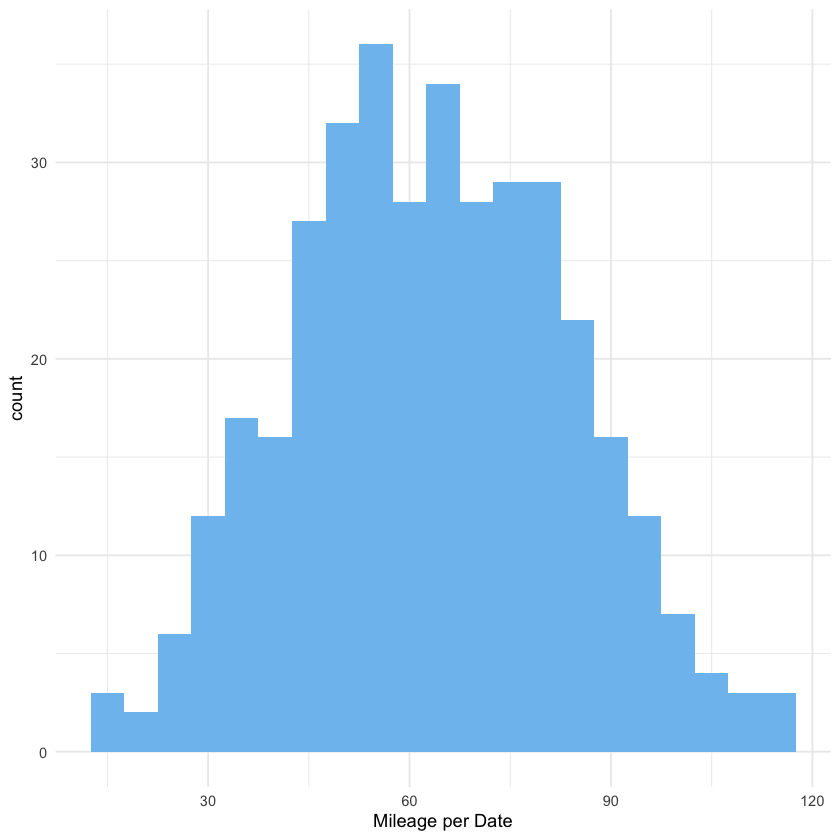

In [20]:
p5 = ggplot(df2d, aes(x=SumMi)) +
    geom_histogram(fill="skyblue2", binwidth=5) +
    theme_minimal() +
    labs(x="Mileage per Date")
p5

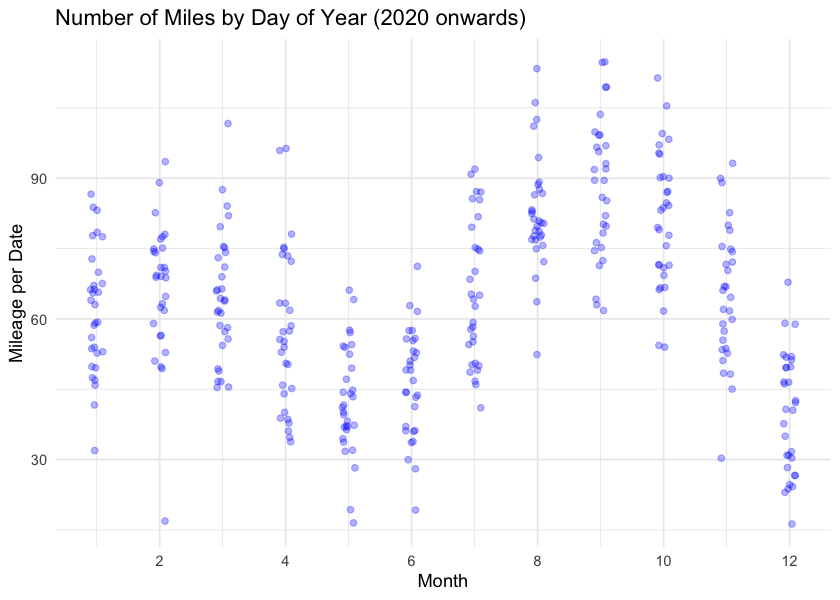

In [21]:
options(repr.plot.width=7, repr.plot.height=5)
p6 = ggplot(df2d, aes(x=Month,y=SumMi)) +
    geom_point(position=position_jitter(w=.1,h=0),color="blue",alpha=.3) +
    theme_minimal() +
    labs(x="Month",y="Mileage per Date",title="Number of Miles by Day of Year (2020 onwards)") +
    scale_x_continuous(breaks=c(0,2,4,6,8,10,12), labels=c(0,2,4,6,8,10,12))
p6

In [22]:
df2o <- df2e %>%
    mutate(szn = ifelse(Month<=3,1,
                        ifelse(Month<=6,2,
                               ifelse(Month<=9,3,4)))) %>%
    group_by(szn) %>%
    mutate(minmaxszn = ifelse(SumMi==min(SumMi) | SumMi==max(SumMi),1,0)) %>%
    ungroup() %>%
    filter(minmaxszn==1) %>%
    # This mutate function will need to be updated whenever a new date meets the above criteria
    # Preferably, it should be automated better at some point
    mutate(Mon_DD = c("Feb 29","Mar 1","Apr 1","May 23","Jul 5","Sep 16","Oct 2","Dec 8")) %>%
    mutate(ny = c(90,15,90,10,35,120,103,18)) %>%
    mutate(nx = c(48,50,128,125,215,300,305,325))
df2o

MMDD,Month,Day,DateOrder,numYear,numYear_cat,SumMi,szn,minmaxszn,Mon_DD,ny,nx
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
2/29,2,29,60,2,less,16.88,1,1,Feb 29,90,48
3/1,3,1,61,11,11,101.67,1,1,Mar 1,15,50
4/5,4,5,96,10,10,96.34,2,1,Apr 1,90,128
5/30,5,30,151,4,less,16.50,2,1,May 23,10,125
7/5,7,5,187,7,7,41.05,3,1,Jul 5,35,215
9/20,9,20,264,13,13,114.81,3,1,Sep 16,120,300
10/2,10,2,276,14,14,111.38,4,1,Oct 2,103,305
12/8,12,8,343,3,less,16.26,4,1,Dec 8,18,325


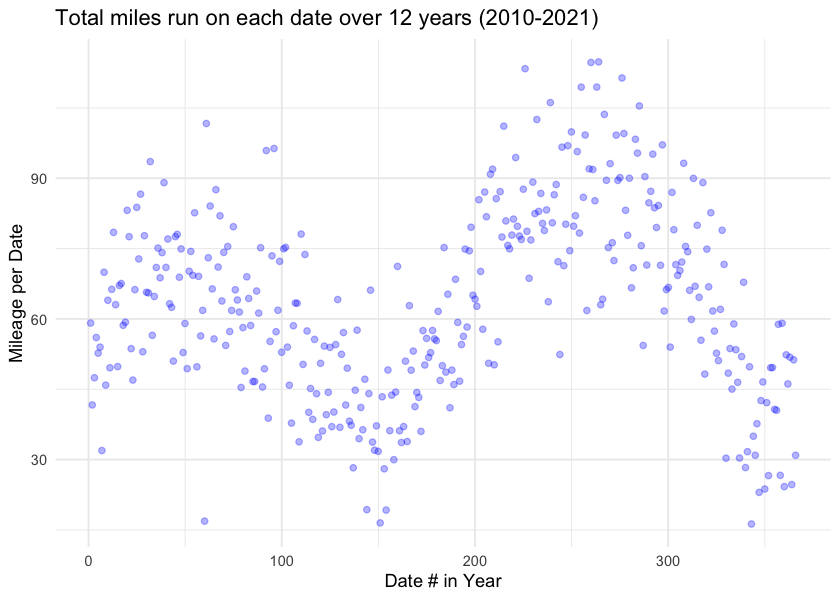

In [23]:
p6a = ggplot(df2d, aes(x=DateOrder,y=SumMi)) +
    geom_point(position=position_jitter(w=.1,h=0),color="blue",alpha=.3) +
    theme_minimal() +
    labs(x="Date # in Year",y="Mileage per Date",title="Total miles run on each date over 12 years (2010-2021)")
p6a

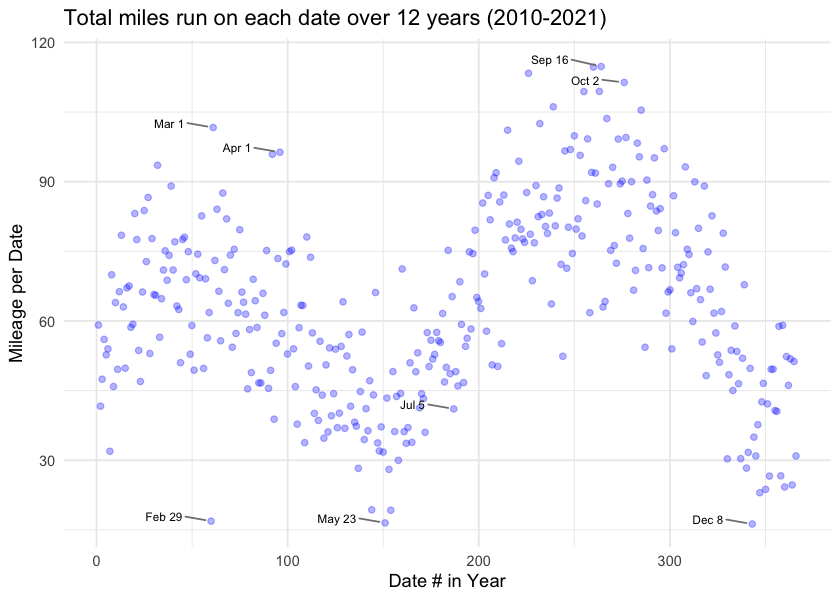

In [24]:
p6b = ggplot(df2d, aes(x=DateOrder,y=SumMi)) +
    geom_point(position=position_jitter(w=.1,h=0),color="blue",alpha=.3) +
    theme_minimal() +
    labs(x="Date # in Year",y="Mileage per Date",title="Total miles run on each date over 12 years (2010-2021)") +
    geom_text_repel(
            data = df2o,
            nudge_y = 1,
            nudge_x = -15,
            segment.size = .5,
            size = 2.5,
            hjust = 1,
            segment.color = "grey50",
            point.padding = .3,
            aes(x=DateOrder, y=SumMi, label = Mon_DD),
        )
p6b

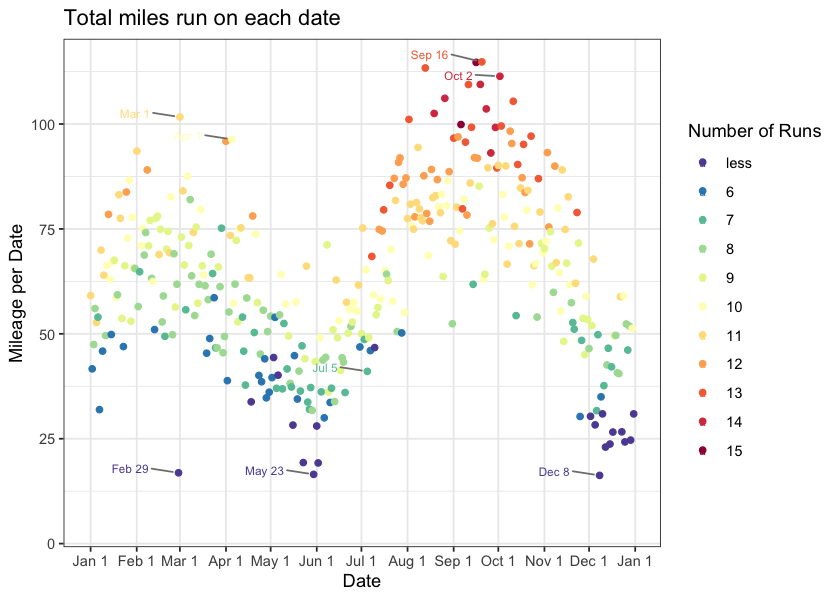

In [25]:
p6c = ggplot(df2d, aes(x=DateOrder,y=SumMi,color=numYear_cat)) +
    geom_point(position=position_jitter(w=.1,h=0),alpha=1) +
    theme_bw() +
    labs(x="Date",y="Mileage per Date",color="Number of Runs",
         title="Total miles run on each date") +
    scale_color_brewer(type="div", palette=9, direction=-1) +
    scale_x_continuous(breaks=c(1,32,61,92,122,153,183,214,245,275,306,336,367), 
                       labels=c("Jan 1","Feb 1","Mar 1","Apr 1","May 1","Jun 1",
                                "Jul 1","Aug 1","Sep 1","Oct 1","Nov 1","Dec 1","Jan 1"),
                       minor_breaks=NULL) +
    scale_y_continuous(limits=c(0,max(df2d$SumMi)+5), breaks=c(0,25,50,75,100), labels=c(0,25,50,75,100)) +
    coord_cartesian(ylim=c(4.67,max(df2d$SumMi))) +
    geom_text_repel(
            data = df2o,
            nudge_y = 1,
            nudge_x = -20,
            segment.size = .5,
            size = 2.5,
            hjust = 1,
            segment.color = "grey50",
            point.padding = .3,
            aes(x=DateOrder, y=SumMi, label = Mon_DD),
        )
p6c

Warning message in geom_text_repel(data = df2o, segment.size = 0.5, size = 5, hjust = 1, :
“Ignoring unknown aesthetics: nudge_y and nudge_x”


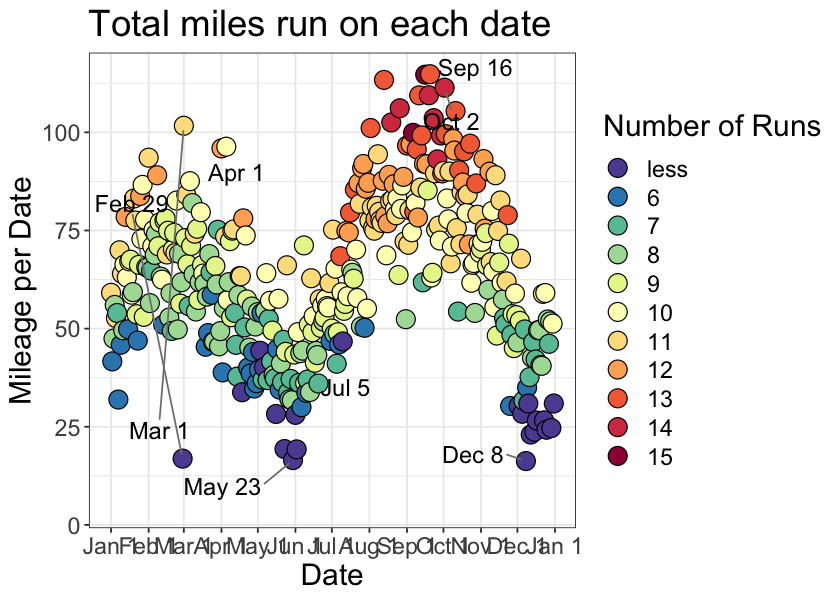

In [26]:
p6d = ggplot(df2d, aes(x=DateOrder,y=SumMi,fill=numYear_cat)) +
  geom_point(position=position_jitter(w=0,h=0),alpha=1, shape=21, size=5) +
  theme_bw() +
  labs(x="Date",y="Mileage per Date",fill="Number of Runs",
       title="Total miles run on each date") +
  scale_fill_brewer(type="div", palette=9, direction=-1) +
  scale_x_continuous(breaks=c(1,32,61,92,122,153,183,214,245,275,306,336,367),
                     labels=c("Jan 1","Feb 1","Mar 1","Apr 1","May 1","Jun 1",
                              "Jul 1","Aug 1","Sep 1","Oct 1","Nov 1","Dec 1","Jan 1"),
                     minor_breaks=NULL) +
  scale_y_continuous(limits=c(0,max(df2d$SumMi)+5), breaks=c(0,25,50,75,100), labels=c(0,25,50,75,100)) +
  coord_cartesian(xlim=c(1,366), ylim=c(4.67,max(df2d$SumMi))) +
  theme(plot.title = element_text(size = 22),
        legend.title = element_text(size = 18),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 14),
        legend.text = element_text(size = 14)) +
  geom_text_repel(
    data = df2o,
    segment.size = .5,
    size = 5,
    hjust = 1,
    segment.color = "grey50",
    point.padding = .3,
    aes(x=DateOrder, y=SumMi, label = Mon_DD, nudge_y = ny, nudge_x = nx),
  )
p6d

In [27]:
df2e %>% select("MMDD","numYear","SumMi") %>% arrange(-SumMi) %>% head(20)

MMDD,numYear,SumMi
<chr>,<dbl>,<dbl>
9/20,13,114.81
9/16,15,114.69
8/13,13,113.36
10/2,14,111.38
9/19,14,109.44
9/11,13,109.42
8/26,14,106.13
10/11,13,105.42
9/23,14,103.61


In [28]:
df2e %>% select("MMDD","numYear","SumMi") %>% arrange(-SumMi) %>% tail(10)

MMDD,numYear,SumMi
<chr>,<dbl>,<dbl>
12/17,5,26.59
12/29,5,24.67
12/25,4,24.24
12/15,4,23.73
12/12,4,23.01
5/23,4,19.32
6/2,4,19.23
2/29,2,16.88
5/30,4,16.50


In [29]:
df2e %>%
    group_by(Month) %>%
    arrange(-SumMi) %>%
    mutate(rk=row_number()) %>%
    filter(rk==1)

MMDD,Month,Day,DateOrder,numYear,numYear_cat,SumMi,rk
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>
9/20,9,20,264,13,13,114.81,1
8/13,8,13,226,13,13,113.36,1
10/2,10,2,276,14,14,111.38,1
3/1,3,1,61,11,11,101.67,1
4/5,4,5,96,10,10,96.34,1
2/1,2,1,32,11,11,93.54,1
11/3,11,3,308,12,12,93.19,1
7/27,7,27,209,12,12,91.93,1
1/27,1,27,27,10,10,86.61,1


In [30]:
df2e %>%
    group_by(Month) %>%
    arrange(SumMi) %>%
    mutate(rk=row_number()) %>%
    filter(rk==1)

MMDD,Month,Day,DateOrder,numYear,numYear_cat,SumMi,rk
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>
12/8,12,8,343,3,less,16.26,1
5/30,5,30,151,4,less,16.50,1
2/29,2,29,60,2,less,16.88,1
6/2,6,2,154,4,less,19.23,1
11/25,11,25,330,6,6,30.30,1
1/7,1,7,7,6,6,31.93,1
4/18,4,18,109,5,less,33.79,1
7/5,7,5,187,7,7,41.05,1
3/19,3,19,79,6,6,45.38,1


In [31]:
df2e %>%
    group_by(Month) %>%
    summarize(mean = mean(SumMi))

Month,mean
<dbl>,<dbl>
1,61.78032
2,66.50552
3,64.98839
4,57.17667
5,42.41065
6,46.28967
7,65.59000
8,82.56516
9,88.19433


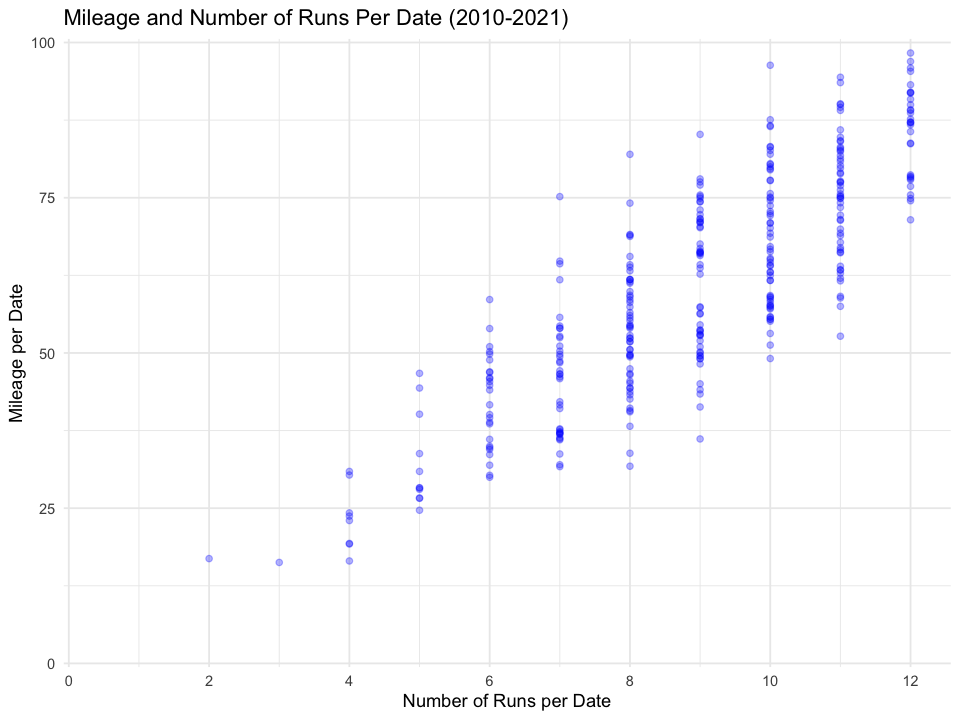

In [32]:
options(repr.plot.height=6, repr.plot.width=8)
p7 = ggplot(df2d, aes(x=numYear,y=SumMi)) +
    geom_point(alpha=.3,color="blue") +
    theme_minimal() +
    labs(x="Number of Runs per Date",y="Mileage per Date",title="Mileage and Number of Runs Per Date (2010-2021)") +
    theme(legend.position="top") +
    coord_cartesian(ylim=c(4,96),xlim=c(.5,12)) +
    scale_x_continuous(breaks=c(0,2,4,6,8,10,12), labels=c(0,2,4,6,8,10,12))
p7

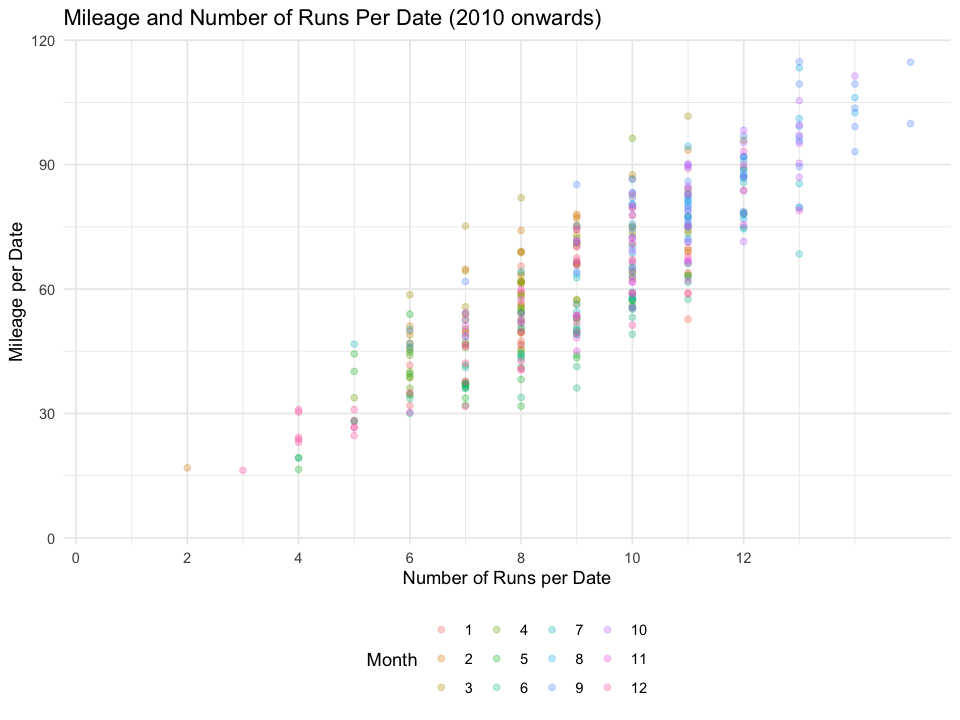

In [33]:
options(repr.plot.height=6, repr.plot.width=8)
p7a = ggplot(df2d, aes(x=numYear,y=SumMi,color=as.factor(Month))) +
    geom_point(alpha=.3) +
    theme_minimal() +
    labs(x="Number of Runs per Date",y="Mileage per Date",title="Mileage and Number of Runs Per Date (2010 onwards)",
        color="Month") +
    theme(legend.position="bottom") +
    coord_cartesian(ylim=c(4,max(df2d$SumMi)),xlim=c(.5,max(df2d$numYear))) +
    scale_x_continuous(breaks=c(0,2,4,6,8,10,12), labels=c(0,2,4,6,8,10,12))
p7a

In [34]:
head(df2e)

MMDD,Month,Day,DateOrder,numYear,numYear_cat,SumMi
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1/1,1,1,1,11,11,59.12
1/2,1,2,2,6,6,41.65
1/3,1,3,3,8,8,47.45
1/4,1,4,4,8,8,56.03
1/5,1,5,5,11,11,52.70
1/6,1,6,6,7,7,53.98


In [35]:
df2e %>% summarize(mean_mi = mean(SumMi), sd_mi = sd(SumMi), mean_n = mean(numYear), sd_n = sd(numYear))

mean_mi,sd_mi,mean_n,sd_n
<dbl>,<dbl>,<dbl>,<dbl>
63.4626,20.21146,9.221311,2.33442


In [36]:
cor(df2e$numYear, df2e$SumMi)

[1] 0.8692452

In [37]:
cov(df2e$numYear, df2e$SumMi)

[1] 41.01277

In [38]:
df2e %>% 
group_by(Month) %>%
summarize(mean_mi = mean(SumMi), sd_mi = sd(SumMi), mean_n = mean(numYear), sd_n = sd(numYear))

Month,mean_mi,sd_mi,mean_n,sd_n
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,61.78032,13.25815,9.096774,1.850312
2,66.50552,14.61653,8.655172,1.856953
3,64.98839,13.50212,8.387097,1.382689
4,57.17667,17.01656,8.400000,2.027399
5,42.41065,11.59531,7.258065,1.750576
6,46.28967,11.60856,8.400000,1.792706
7,65.59000,15.15276,9.903226,2.196282
8,82.56516,12.09118,11.193548,1.301777
9,88.19433,14.86594,11.800000,1.972221


In [39]:
df2e %>%
    filter(Month==10)

MMDD,Month,Day,DateOrder,numYear,numYear_cat,SumMi
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
10/1,10,1,275,11,11,90.13
10/2,10,2,276,14,14,111.38
10/3,10,3,277,13,13,99.53
10/4,10,4,278,10,10,83.16
10/5,10,5,279,10,10,77.83
10/6,10,6,280,11,11,90.01
10/7,10,7,281,11,11,66.63
10/8,10,8,282,10,10,70.90
10/9,10,9,283,12,12,98.31


In [40]:
png("rpd.png", width=1200, height=800)
ggplot(df2d, aes(x=DateOrder,y=SumMi,fill=numYear_cat)) +
  geom_point(position=position_jitter(w=0,h=0),alpha=1, shape=21, size=5) +
  theme_bw() +
  labs(x="Date",y="Mileage per Date",fill="Number of Runs",
       title="Total miles run on each date") +
  scale_fill_brewer(type="div", palette=9, direction=-1) +
  scale_x_continuous(breaks=c(1,32,61,92,122,153,183,214,245,275,306,336,367),
                     labels=c("Jan 1","Feb 1","Mar 1","Apr 1","May 1","Jun 1",
                              "Jul 1","Aug 1","Sep 1","Oct 1","Nov 1","Dec 1","Jan 1"),
                     minor_breaks=NULL) +
  scale_y_continuous(limits=c(0,max(df2d$SumMi)+5), breaks=c(0,25,50,75,100), labels=c(0,25,50,75,100)) +
  coord_cartesian(xlim=c(1,366), ylim=c(4.67,max(df2d$SumMi))) +
  theme(plot.title = element_text(size = 22),
        legend.title = element_text(size = 18),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 14),
        legend.text = element_text(size = 14)) +
  geom_text_repel(
    data = df2o,
    segment.size = .5,
    size = 5,
    hjust = 1,
    segment.color = "grey50",
    point.padding = .3,
    aes(x=DateOrder, y=SumMi, label = Mon_DD, nudge_y = ny, nudge_x = nx),
  )
dev.off()

Warning message in geom_text_repel(data = df2o, segment.size = 0.5, size = 5, hjust = 1, :
“Ignoring unknown aesthetics: nudge_y and nudge_x”


pdf 
  2

In [41]:
df2d %>% head(10)

Date,Mileage,time_corr,pace_min,Year,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear,DateOrder,SumMi,numYear_cat
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2025-01-01,8.37,0:56:27,6.744325,2025,1,1,1/1,11,1,1,1,11,1,59.12,11
2022-01-02,7.07,0:51:00,7.213579,2022,1,2,1/2,6,1,1,1,6,2,41.65,6
2025-01-03,2.82,0:20:59,7.440898,2025,1,3,1/3,9,1,1,1,8,3,47.45,8
2025-01-04,13.11,1:37:59,7.473938,2025,1,4,1/4,8,1,1,1,8,4,56.03,8
2024-01-05,3.11,0:21:22,6.870311,2024,1,5,1/5,11,1,1,1,11,5,52.70,11
2023-01-06,9.08,1:06:09,7.285242,2023,1,6,1/6,7,1,1,1,7,6,53.98,7
2025-01-07,5.42,0:39:12,7.232472,2025,1,7,1/7,6,1,1,1,6,7,31.93,6
2025-01-08,8.91,1:04:51,7.278339,2025,1,8,1/8,11,1,1,1,11,8,69.95,11
2021-01-09,11.12,1:17:22,6.957434,2021,1,9,1/9,6,1,1,1,6,9,45.88,6


In [42]:
df3 <- df %>% 
    mutate(weekday = weekdays(Date))
df3$weekday <- fct_relevel(df3$weekday, "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
df3 %>% tail(20)

Date,Mileage,time_corr,pace_min,Year,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear,weekday
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2011-12-29,4.20,0:30:58,7.373016,2011,12,29,12/29,1,0,1,1,1,Thursday
2014-12-29,3.50,0:24:08,6.895238,2014,12,29,12/29,2,0,1,1,2,Monday
2016-12-29,7.00,0:50:35,7.226190,2016,12,29,12/29,3,0,1,1,3,Thursday
2017-12-29,7.10,0:53:16,7.502347,2017,12,29,12/29,4,0,1,1,4,Friday
2018-12-29,2.87,NA,NA,2018,12,29,12/29,5,1,1,1,5,Saturday
2010-12-30,5.10,0:42:42,8.372549,2010,12,30,12/30,1,0,1,1,1,Thursday
2011-12-30,6.10,0:49:18,8.081967,2011,12,30,12/30,2,0,1,1,2,Friday
2012-12-30,4.47,0:35:22,7.912006,2012,12,30,12/30,3,0,1,1,3,Sunday
2014-12-30,4.25,0:35:43,8.403922,2014,12,30,12/30,4,0,1,1,4,Tuesday


In [43]:
df3 %>% 
    # filter(Year<2019) %>%
    group_by(weekday) %>%
    summarize(miles = sum(Mileage),
              n_runs = n()) %>%
    arrange(-miles)

weekday,miles,n_runs
<fct>,<dbl>,<int>
Saturday,4043.11,568
Wednesday,3701.57,545
Friday,3382.60,588
Tuesday,3372.49,563
Thursday,3164.63,534
Sunday,2867.26,369
Monday,2695.65,456


In [44]:
df3 %>% 
    filter(Year==2018) %>%
    group_by(weekday) %>%
    summarize(miles = sum(Mileage),
              n_runs = n()) %>%
    arrange(-miles)

weekday,miles,n_runs
<fct>,<dbl>,<int>
Tuesday,494.89,63
Wednesday,469.31,57
Saturday,441.79,50
Thursday,439.82,55
Sunday,419.14,39
Friday,419.06,57
Monday,290.99,41


In [45]:
df3 %>%
    group_by(Year) %>%
    summarize(miles = sum(Mileage),
              n_runs=n()) %>%
    arrange(-miles)

Year,miles,n_runs
<dbl>,<dbl>,<int>
2018,2975.00,362
2020,2428.40,298
2019,2313.99,311
2017,2200.00,314
2016,2036.79,297
2015,1658.34,299
2021,1531.00,223
2025,1425.12,205
2024,1383.00,206


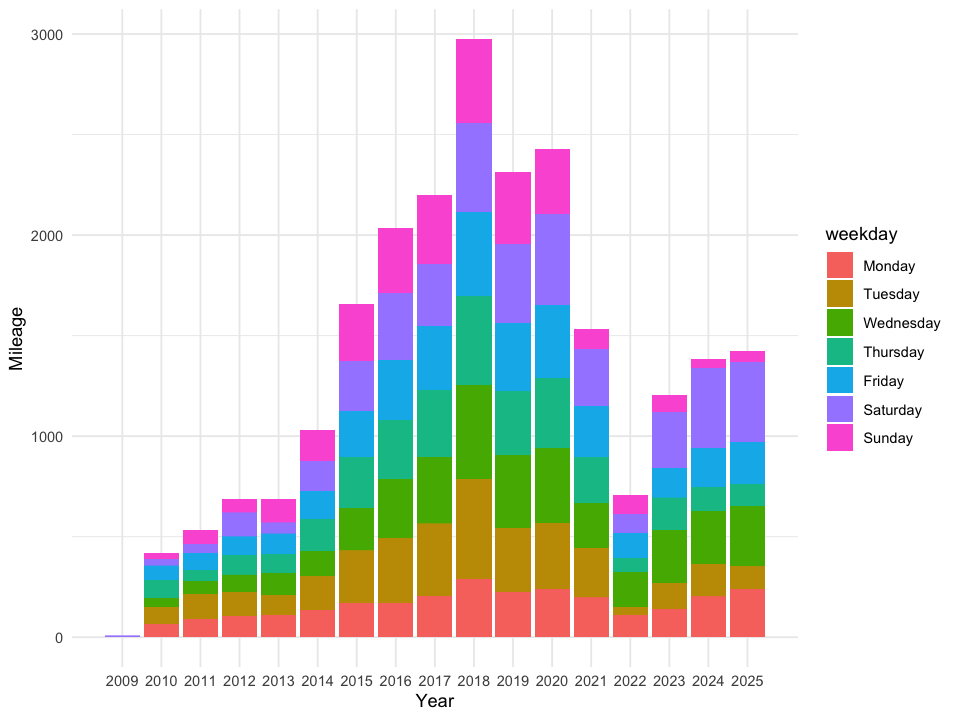

In [46]:
p8 = ggplot(df3, aes(x=Year, y=Mileage, fill=weekday)) +
    geom_col(position=position_stack(reverse=TRUE)) +
    theme_minimal() +
    scale_x_continuous(breaks=seq(from=2009,to=2025,by=1),minor_breaks=NULL)
p8

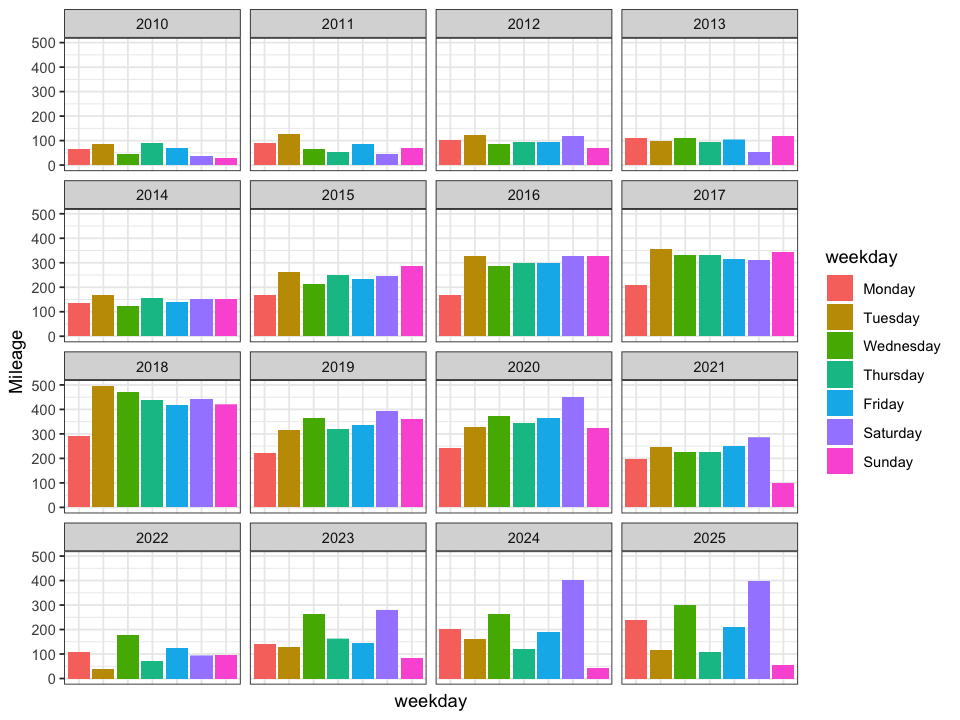

In [47]:
p8a = ggplot(data = df3 %>% filter(Year >= 2010 & Year <= 2025), 
             mapping = aes(x=weekday, y=Mileage, fill=weekday)) +
    geom_col() +
    theme_bw() +
    facet_wrap(~Year) +
    scale_x_discrete(labels=NULL) +
    theme(axis.ticks.x=element_blank())
p8a

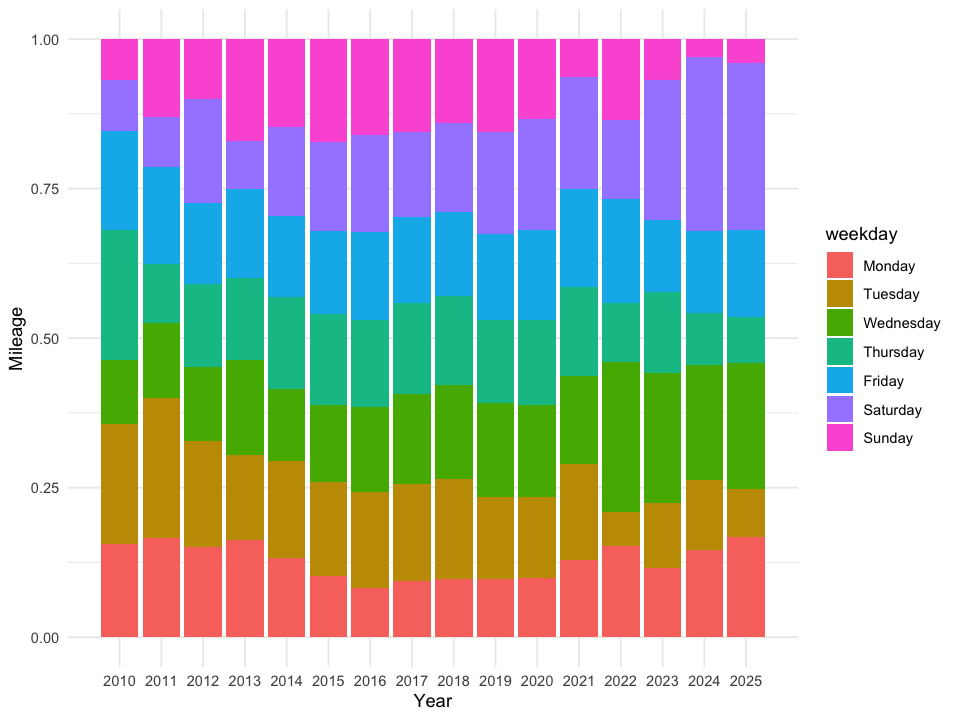

In [48]:
p8b = ggplot(data = df3 %>% filter(Year >= 2010), 
             mapping = aes(x=Year, y=Mileage, fill=weekday)) +
    geom_col(position=position_fill(reverse=TRUE)) +
    theme_minimal() +
    scale_x_continuous(breaks=seq(from=2010,to=2025,by=1),minor_breaks=NULL)
p8b